# Analyse exploratoire - Projets -  Idées innovantes d’applications en lien avec l'alimentation <br /> <font color='green'> -- Bonnes habitudes alimentaires  </font> 

## Résumé 

On veut savoir les aliments les plus addapté pour une personne que envisage d'aquerir de bonnes habitudes alimentaires. On cherche donc à prédire la présence de graisses saturées, omega 3, omega 6, omega 9, du sel et sucre non necessaire, vitamines, fibres, mineraux, proteines et calcium. Cela en evitant les additifs et on previlegient les aliments avec un nutriscore et ecoscore favorable.

## Bibliotheques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sklearn.metrics as metrics
from myfile import correl_pvalue, create_régression_linéaire,percentage_error,display_circles, \
                   display_scree_plot,scatter_plot_nutriscore,separete_liquid_solid,\
                   histograme_plot,boxplot_plot,plot_box_plot                  
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import Image
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

import warnings
warnings.simplefilter(action='ignore', category=Warning)

sns.set()

## Données utilise

In [2]:
pd.set_option("display.precision", 2)          
pd.set_option("display.max.columns", None)    
pd.set_option("display.max.rows", None)

dir_data = Path('../../DATA/P3/') 
dir_fig  = Path('../../FIGURES/P3/')

marche_FR =0
file1 = Path(str(dir_data) + "/Projet_NScore.openfoodfacts.org.products.csv")

df_in =pd.read_csv(str(file1),  sep='\t', encoding='utf-8', low_memory=False)


In [3]:
df=pd.melt(frame=df_in, 
id_vars   =["nutriscore_grade",'product_name','categories','countries_en','ecoscore_grade_fr'] ,
value_vars=["sugars_100g","saturated-fat_100g",'energy_100g','sodium_100g','carbohydrates_100g','proteins_100g',
            'fiber_100g','additives_n','fat_100g','ecoscore_score_fr','nova_group'],
var_name  ="Food_composition", 
value_name="Quantities") 

In [4]:
if marche_FR == 1:
    region = 'FR_'
    df1=df[df['countries_en'].str.contains('France', na=True)]  
else:
    region = 'GLOBAL_'
    df1=df

## Analyse exploratoire 

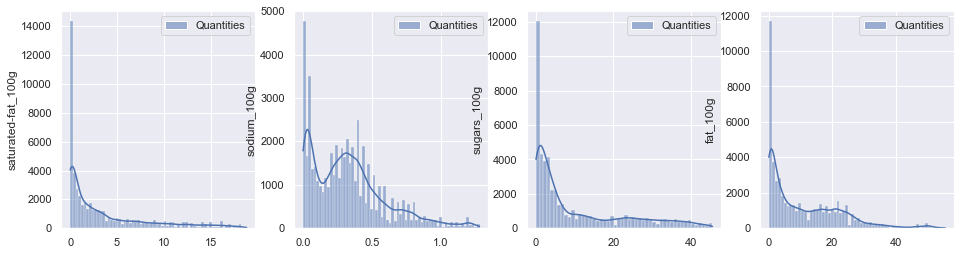

<Figure size 432x288 with 0 Axes>

In [5]:
varname='Food_composition'
tcolors="teal"

figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_data_1.jpeg'))
#
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
histograme_plot(df1, varname,'saturated-fat_100g',axs[0],tcolors)
histograme_plot(df1, varname,'sodium_100g',axs[1],tcolors)
histograme_plot(df1, varname,'sugars_100g',axs[2],tcolors)
histograme_plot(df1, varname,'fat_100g',axs[3],tcolors)
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

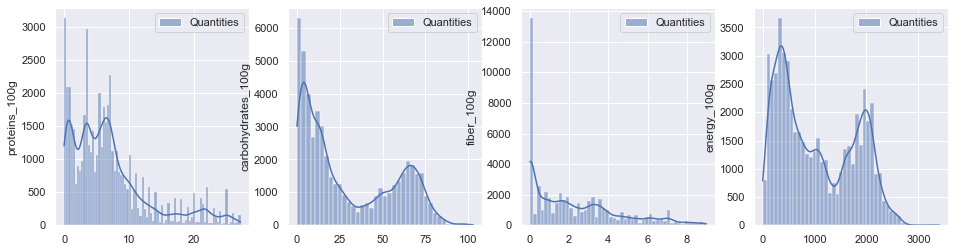

<Figure size 432x288 with 0 Axes>

In [6]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_data_2.jpeg'))
#
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
histograme_plot(df1, varname,'proteins_100g',axs[0],tcolors)
histograme_plot(df1, varname,'carbohydrates_100g',axs[1],tcolors)
histograme_plot(df1, varname,'fiber_100g',axs[2],tcolors)
histograme_plot(df1, varname,'energy_100g',axs[3],tcolors)
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

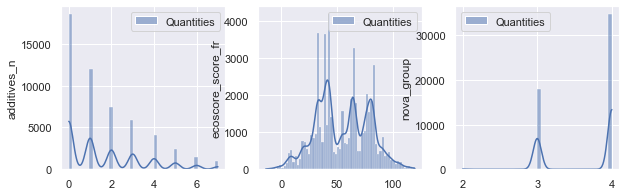

<Figure size 432x288 with 0 Axes>

In [7]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_data_3.jpeg'))
#
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
histograme_plot(df1, varname,'additives_n',axs[0],tcolors)
histograme_plot(df1, varname,'ecoscore_score_fr',axs[1],tcolors)
histograme_plot(df1, varname,'nova_group',axs[2],tcolors)
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')


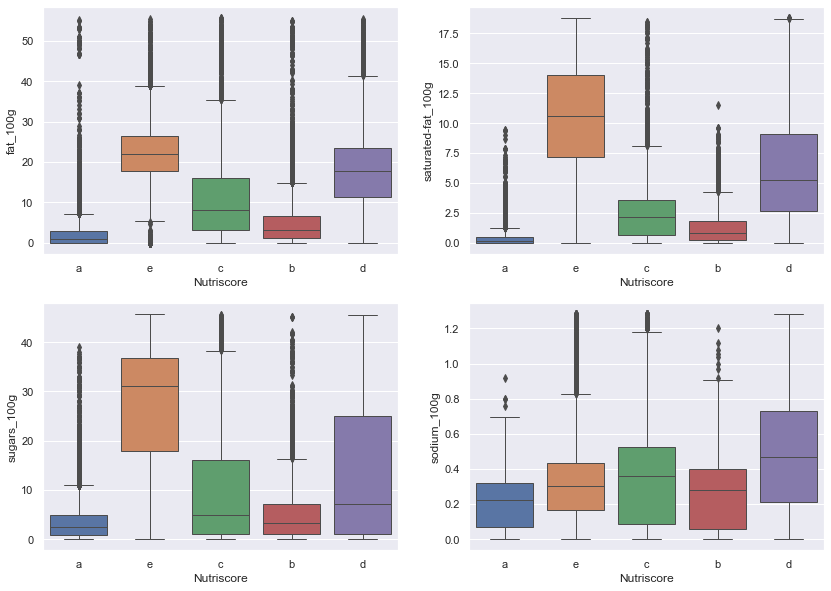

In [8]:
varname='Food_composition'
linewidthy=1
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_nutriscore_1.jpeg'))
# #
fig, axs = plt.subplots (2, 2, figsize=(14, 10))
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','fat_100g',axs[0,0],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','saturated-fat_100g',axs[0,1],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','sugars_100g',axs[1,0],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','sodium_100g',axs[1,1],linewidthy,"Nutriscore",'','',1)

plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

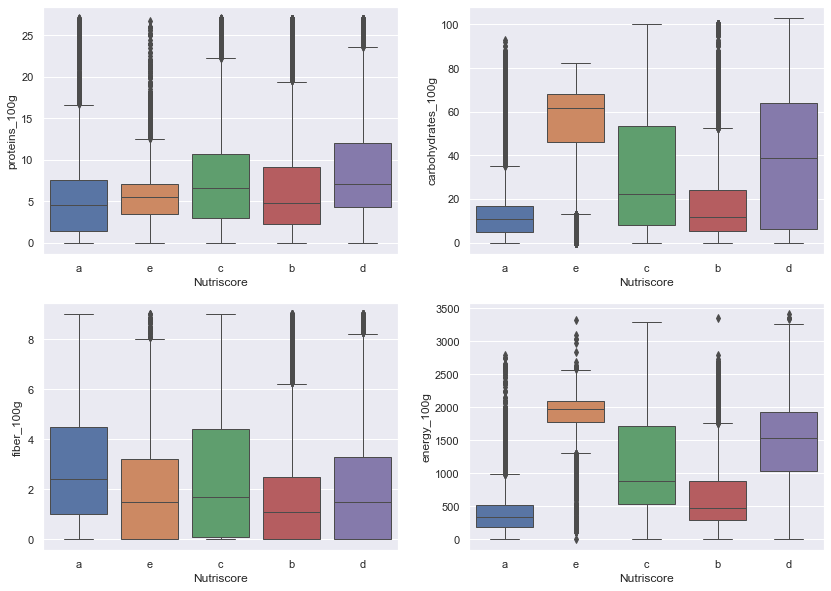

In [9]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_nutriscore_2.jpeg'))
fig, axs = plt.subplots (2, 2, figsize=(14, 10))
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','proteins_100g',axs[0,0],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','carbohydrates_100g',axs[0,1],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','fiber_100g',axs[1,0],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','energy_100g',axs[1,1],linewidthy,"Nutriscore",'','',1)

plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

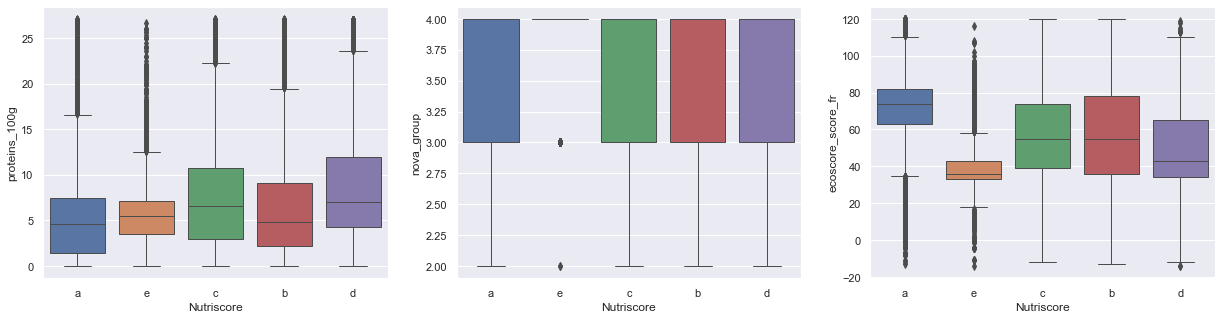

In [10]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Over_view_nutriscore_3.jpeg'))
fig, axs = plt.subplots (1, 3, figsize=(21, 5))
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','proteins_100g',axs[0],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','nova_group',axs[1],linewidthy,"Nutriscore",'','',1)
boxplot_plot(df1, varname,'nutriscore_grade','Quantities','ecoscore_score_fr',axs[2],linewidthy,"Nutriscore",'','',1)

plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


#### Quel est l'origine de ces carbohydrates dans des produits avec nutriscore D  et E? simple or complex carbohydrates?

#---simple carbohydrates ----- > monosaccharides (fructose (found in fruits) and galactose (found in milk products)), disaccharides (sucrose (table sugar), lactose (from dairy) and maltose (found in beer and some vegetables))
#---"empty calories" and can lead to weight gain
#---Complex carbohydrates (polysaccharides) include beans, peas, lentils, peanuts, potatoes, corn, parsnips, whole-grain breads and cereals.

#### D et E sont tres energetiques. à cause de processed and refined sugars (empty calories")?  C'est à eviter


In [11]:
var_2_drop=["Unnamed: 0",'countries_en','ingredients_text']

df_projet = df_in.drop(var_2_drop, axis=1)        
data_corr = df_projet.drop(["nutriscore_grade",'ecoscore_grade_fr','categories','product_name'], axis=1)

[coef_correl,pvalue] = correl_pvalue(data_corr)

In [12]:
pvalue.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))
# if pvalue > 0.05:
#     print('Probably independent')
# else:
#     print('Probably dependent')

,nutriscore_score,nova_group,ecoscore_score_fr,fat_100g,saturated-fat_100g,energy-kcal_100g,energy_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g,fiber_100g,additives_n
nutriscore_score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8e-149,0.0,5.5e-107,0.0
nova_group,0.0,0.0,0.0,3.4e-12,4.3e-112,4.3e-128,7.4e-129,0.0,0.0,1.8e-125,0.04,2.4e-120,0.0
ecoscore_score_fr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5e-18,0.0,0.0,1.6e-139,2.1e-302,0.0
fat_100g,0.0,3.4e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7e-126
saturated-fat_100g,0.0,4.3e-112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8e-118,0.077,2.9e-314
energy-kcal_100g,0.0,4.3e-128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5e-286
energy_100g,0.0,7.4e-129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3e-284
carbohydrates_100g,0.0,0.0,2.5e-18,0.0,0.0,0.0,0.0,0.0,0.0,1e-78,0.091,0.0,0.0
sugars_100g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.9e-138,0.0
proteins_100g,3.8e-149,1.8e-125,0.0,0.0,0.0,0.0,0.0,1e-78,0.0,0.0,0.0,1.1e-50,8.7e-107


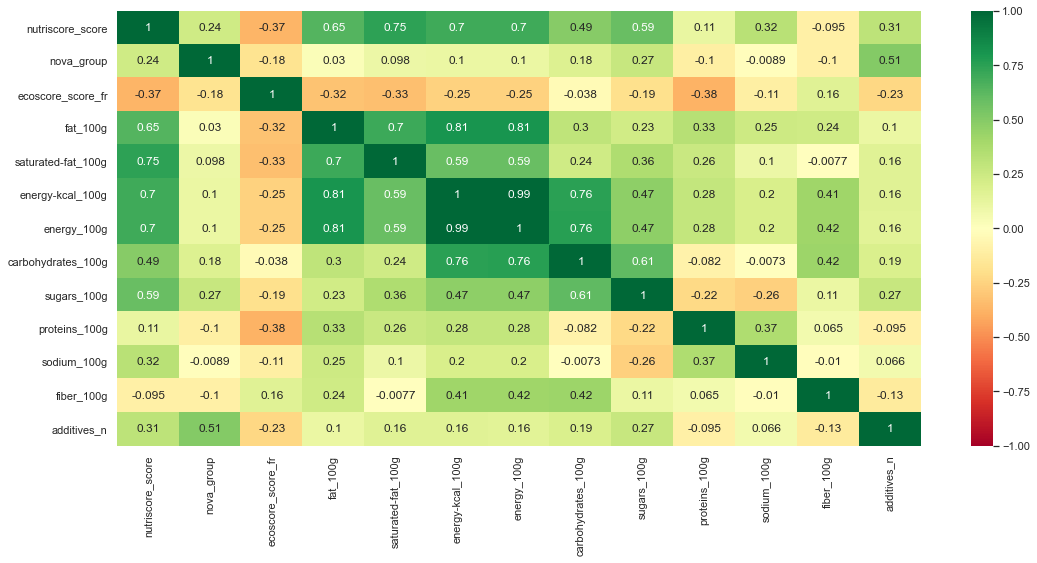

In [13]:
plt.figure(figsize=(18,8))
sns.heatmap(coef_correl, vmin=-1, vmax=1,  annot=True, cmap='RdYlGn')
plt.show()


### Predict nutriscore using  Linear regression 

In [14]:
y=df_projet['nutriscore_score']
X=pd.DataFrame(np.c_[df_projet['saturated-fat_100g'],df_projet['energy_100g'],df_projet['fat_100g'],df_projet['carbohydrates_100g'],
                     df_projet['sugars_100g'],df_projet['proteins_100g'],df_projet['sodium_100g'], 
                     df_projet['nova_group'],df_projet['ecoscore_score_fr'],
                     df_projet['additives_n'],df_projet['fiber_100g'],   
                     df_projet['product_name'],df_projet['nutriscore_grade'],df_projet['categories']])
tsize=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize)
import copy
X_train_all=copy.deepcopy(X_train)
X_test_all =copy.deepcopy(X_test)

y_teste=X_test.values[:,-3]
y_testc=X_test.values[:,-2]
y_testd=X_test.values[:,-1]
X_train=X_train.values[:,:-3]
X_test =X_test.values[:,:-3]
y_traine=X_train[:,-3].reshape(-1,1)
y_trainc=X_train[:,-2].reshape(-1,1)
y_traind=X_train[:,-1].reshape(-1,1)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred = regr.predict(X_test)
 
df_score = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Nutriscore_grade': y_testc,'categories': y_testd,
                         'product_name':y_teste,'Actual-Predicted':y_test-y_pred})

In [16]:
print('Coefficients: \n', regr.coef_)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred))) # Note that for rmse, the lower that value is, the better the fit
test_set_r2 = r2_score(y_test, y_pred)                        # The closer towards 1, the better the fit
print('root-mean-square error ',test_set_rmse)
print('Coefficient of determination:', test_set_r2)


Coefficients: 
 [ 7.11574249e-01  3.56672735e-03  3.31742004e-02  1.61042987e-02
  2.36260709e-01 -1.84008426e-01  1.09766467e+01  3.51634382e-01
 -1.73622540e-02  3.15891203e-02 -1.00885822e+00]
root-mean-square error  2.8589342490698852
Coefficient of determination: 0.890083147981142


##### Equation 

In [17]:
y_predit = regr.intercept_ + [np.sum(regr.coef_*X_test[i,:]) for i in range(len(X_test))]
error    = y_predit-y_pred

##### Predicted vs Normal data

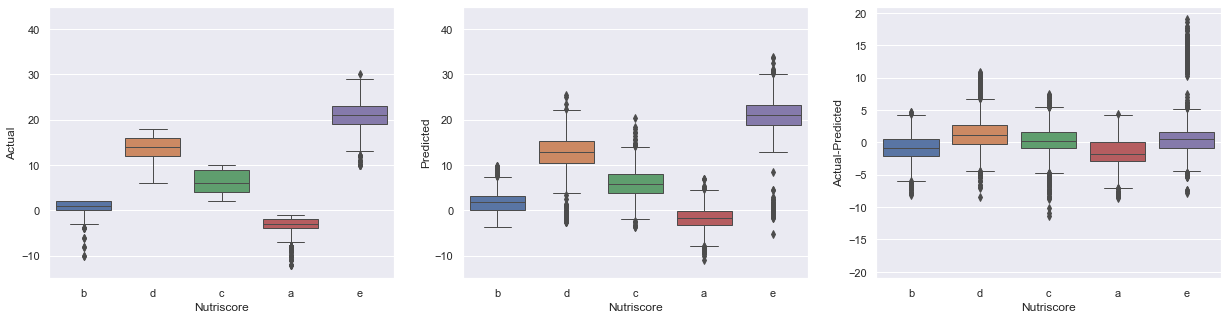

In [18]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Linear_regression.jpeg'))
miny=-15
maxy=40
ds=21

fig, axs = plt.subplots (1, 3, figsize=(21, 5))
boxplot_plot(df_score,'','Nutriscore_grade','Actual','Actual',axs[0],linewidthy,"Nutriscore",miny, maxy,0)
boxplot_plot(df_score,'','Nutriscore_grade','Predicted','Predicted',axs[1],linewidthy,"Nutriscore",miny, maxy,0)
boxplot_plot(df_score,'','Nutriscore_grade','Actual-Predicted','Actual-Predicted',axs[2],linewidthy,"Nutriscore",-ds,ds,0)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


In [19]:
listS    =[-15,0,3,11,19]  # pour solid food
listS_max=[-1,2,10,18,40]
listL    =[-1,1, 2,6,40]   # pour liquid food
listL_max=[-1,1,5,9,40]

[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(df_score,"Actual","Predicted", listS_max[2],str("a,b,c"))

For nutriscore a,b,c
Groups   Actual   Predicted   commun_products  % difference        Length mask
a,b,c      6389         7094               6305         1.3              10586


In [20]:
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(df_score,"Actual","Predicted", listS_max[3],str("d,e"))

For nutriscore d,e
Groups   Actual   Predicted   commun_products  % difference        Length mask
d,e      1324         1339               1172         11.5              10586


### PCA

In [21]:
from sklearn import decomposition
from sklearn import preprocessing 
n_comp=4
feat_cols = 'saturated-fat_100g','energy_100g','fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','sodium_100g','nova_group',\
           'ecoscore_score_fr','additives_n','fiber_100g'
x = df_projet.loc[:, feat_cols].values
y = df_projet['nutriscore_score']

names = df_projet.index
scaler = preprocessing.StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)
pca = decomposition.PCA(n_components=n_comp)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

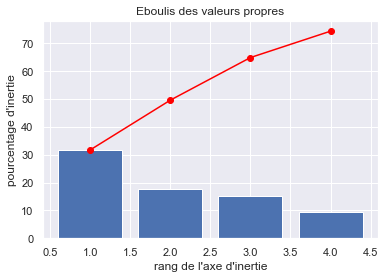

In [22]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('percentagen_explique.jpeg'))

display_scree_plot(pca)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

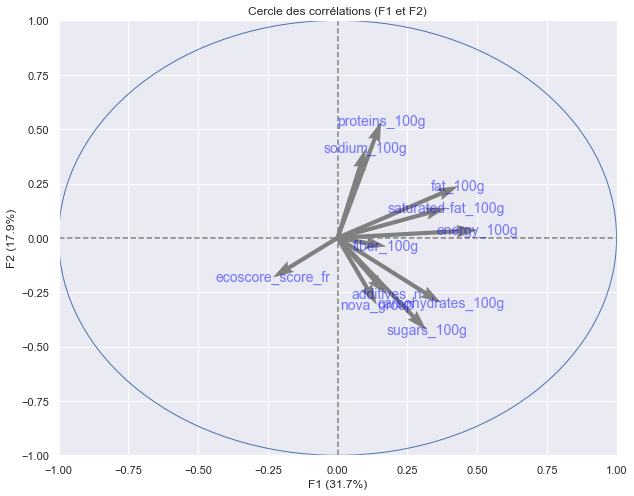

In [23]:
# Cercle des corrélations
pcs = pca.components_
figure_name =Path(str(dir_fig) +'/' + str(region) + str('cicle_correle.jpeg'))

display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(feat_cols))
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

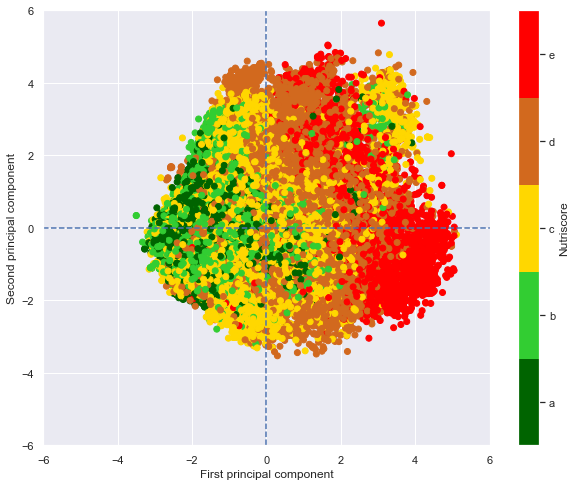

In [24]:
xlim1=[-6,6]
ylim1=[-6,6]
nutriscore=["a","b","c","d","e"]
cmapy = ListedColormap(['darkgreen','limegreen','gold','chocolate','red'])
bounds = [-15,-1,2,10,18,40]
normy = BoundaryNorm(bounds, cmapy.N)

figure_name =Path(str(dir_fig) +'/' + str(region) + str('scatter_individue.jpeg'))

scatter_plot_nutriscore(x_pca[:,0],x_pca[:,1],y,cmapy,normy,xlim1,ylim1,'First principal component',
                        'Second principal component','Nutriscore',bounds,nutriscore)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

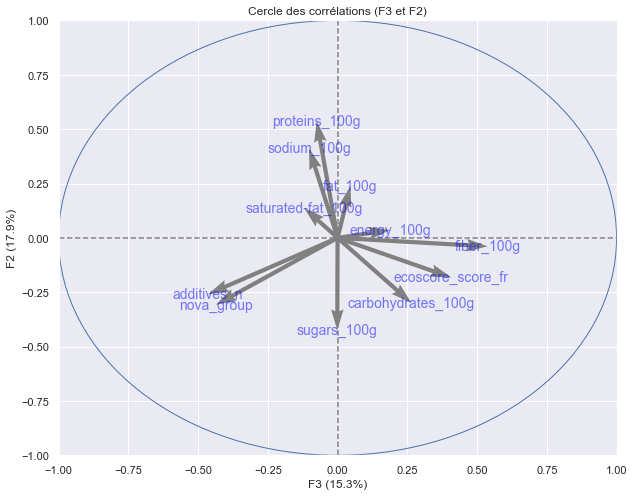

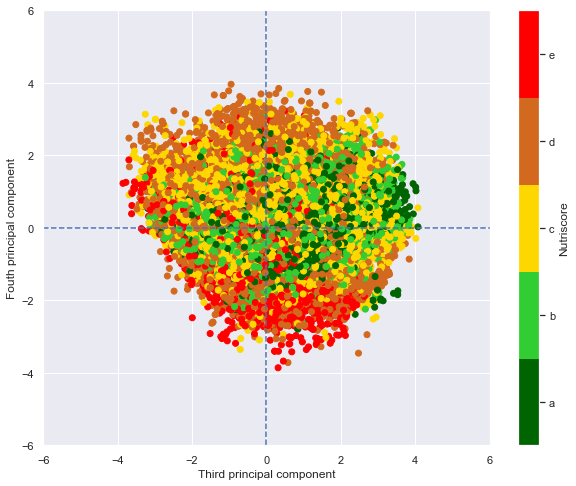

In [25]:
display_circles(pcs, n_comp, pca, [(2,1)], labels = np.array(feat_cols))


scatter_plot_nutriscore(x_pca[:,2],x_pca[:,3],y,cmapy,normy,xlim1,ylim1,'Third principal component',
                        'Fouth principal component','Nutriscore',bounds,nutriscore)


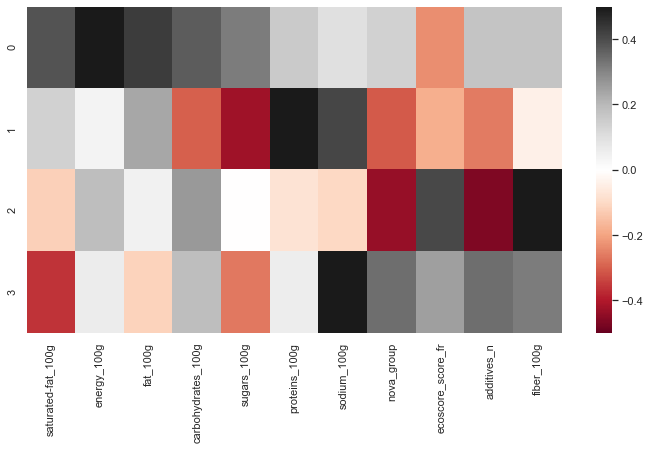

In [26]:
map= pd.DataFrame(pca.components_,columns=feat_cols)
plt.figure(figsize=(12,6))
ds=2
gfg=sns.heatmap(map,cmap='RdGy', vmin=-1/ds, vmax=1/ds)

In [27]:
pca.explained_variance_ratio_

array([0.3172618 , 0.17859429, 0.15288764, 0.09473371])

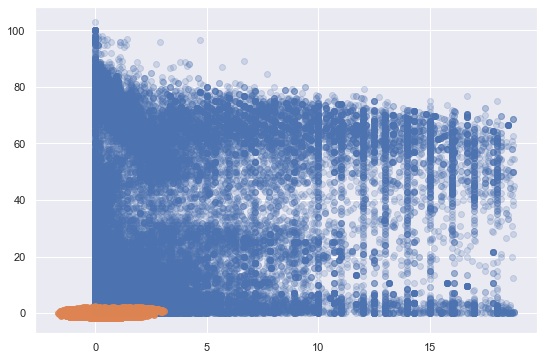

In [28]:
x_new = pca.inverse_transform(x_pca)

fig, axs = plt.subplots (1, 1, figsize=(9,6))
plt.scatter(x[:, 0], x[:, 3], alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 3], alpha=0.8)
#plt.axis('equal');

In [29]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(x_new, y, test_size=tsize)

regr_pca = linear_model.LinearRegression()
regr_pca.fit(X_pca_train, y_pca_train)
y_pca_pred = regr_pca.predict(X_pca_test)
 
df_pca_score = pd.DataFrame({'Actual': y_pca_test, 'Predicted': y_pca_pred,'Nutriscore_grade': y_testc,'categories': y_testd,
                         'product_name':y_teste,'Actual-Predicted':y_pca_test-y_pca_pred})

In [30]:
print('Coefficients: \n', regr_pca.coef_)

test_set_rmse_pca = (np.sqrt(mean_squared_error(y_pca_test, y_pca_pred))) # Note that for rmse, the lower that value is, the better the fit
test_set_r2_pca = r2_score(y_pca_test, y_pca_pred)                        # The closer towards 1, the better the fit
print('root-mean-square error ',test_set_rmse_pca)
print('Coefficient of determination:', test_set_r2_pca)


Coefficients: 
 [-4.02550259e+12 -1.22226670e+13 -1.37736834e+13 -1.85037640e+13
  9.17457293e+12  1.10403469e+14 -7.62574717e+13  2.72086690e+13
  3.64502122e+13  3.38278641e+13  3.82511363e+13]
root-mean-square error  4.741986361733891
Coefficient of determination: 0.6948727714760348


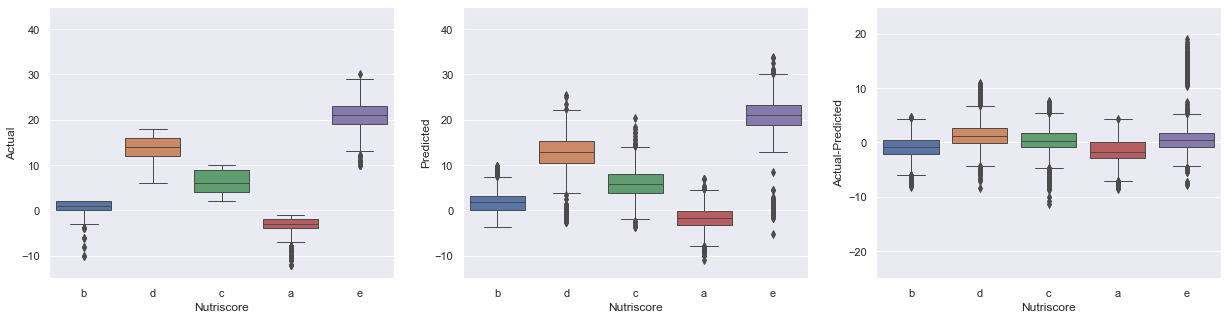

In [31]:
miny=-15
maxy=40
ds=25
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Linear_regression_PCA.jpeg'))
fig, axs = plt.subplots (1, 3, figsize=(21, 5))
boxplot_plot(df_score,'','Nutriscore_grade','Actual','Actual',axs[0],linewidthy,"Nutriscore",miny, maxy,0)
boxplot_plot(df_score,'','Nutriscore_grade','Predicted','Predicted',axs[1],linewidthy,"Nutriscore",miny, maxy,0)
boxplot_plot(df_score,'','Nutriscore_grade','Actual-Predicted','Actual-Predicted',axs[2],linewidthy,"Nutriscore",-ds,ds,0)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


In [32]:
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(df_pca_score,"Actual","Predicted", listS_max[2],str("a,b,c"))

For nutriscore a,b,c
Groups   Actual   Predicted   commun_products  % difference        Length mask
a,b,c      6456         7137               6030         6.6              10586


In [33]:
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(df_pca_score,"Actual","Predicted", listS_max[3],str("d,e"))

For nutriscore d,e
Groups   Actual   Predicted   commun_products  % difference        Length mask
d,e      1262         913               721         42.9              10586


Equation

In [34]:
y_pca_predit = regr_pca.intercept_ + [np.sum(regr_pca.coef_*X_pca_test[i,:]) for i in range(len(X_pca_test))]
error    = y_pca_predit-y_pca_pred

En utilisant regression seule or avec pca, le percentage d'erreur est le meme. Je pense que le probleme vient des liquid vs solid food 

possible source de erreur: la division de nutriscore des liquid et solid food ne sont pas identique. 
penser à separer les produits en 2 categories?

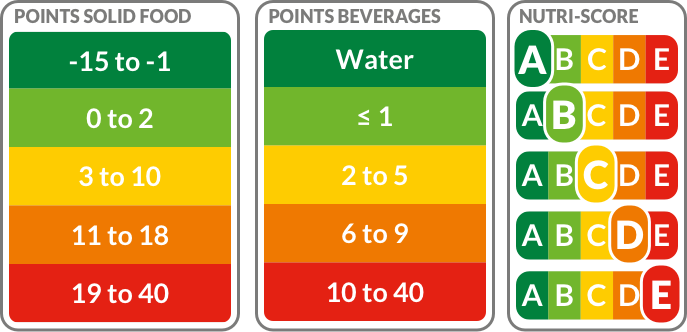

In [35]:
Image(filename = str(dir_fig) + "/"+ str("nutriscore-table-en@1_5x.png"), width=500, height=500)


In [36]:
da=1
dss=0
[liquid, solid] = separete_liquid_solid(df_score,da,dss)
[L_Vmask_actual,L_Vmask_Predict,L_commun_products,L_difference,L_mask_len]=percentage_error(liquid,"Actual","Predicted", 
                                                                                                listL_max[3],str("a,b,c"))
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(liquid,"Actual","Predicted", 
                                                                                      listL_max[3],str("d,e"))

For nutriscore a,b,c
Groups   Actual   Predicted   commun_products  % difference        Length mask
a,b,c      778         908               776         0.3              1224
For nutriscore d,e
Groups   Actual   Predicted   commun_products  % difference        Length mask
d,e      410         316               306         25.4              1224


In [37]:

[L_Vmask_actual,L_Vmask_Predict,L_commun_products,L_difference,L_mask_len]=percentage_error(solid,"Actual","Predicted", 
                                                                                                listS_max[3],str("a,b,c"))
[Vmask_actual, Vmask_Predict, commun_products, difference, mask_len]=percentage_error(solid,"Actual","Predicted", 
                                                                                      listS_max[3],str("d,e"))

For nutriscore a,b,c
Groups   Actual   Predicted   commun_products  % difference        Length mask
a,b,c      7841         8048               7744         1.2              9337
For nutriscore d,e
Groups   Actual   Predicted   commun_products  % difference        Length mask
d,e      1275         1289               1132         11.2              9337


Le percentage ne s'ameliere pas meme apres la separation des solid et liquid dans les produits francais

### KMeans
#### KMeans with all data

In [38]:
sum_of_squared_distances = []
si_coef = []
K = range(1,11)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(x)
    sum_of_squared_distances.append(k_means.inertia_)
    labels_k = k_means.labels_
    if k>1:
        si_coef.append(metrics.silhouette_score(x, labels_k, metric = 'euclidean'))

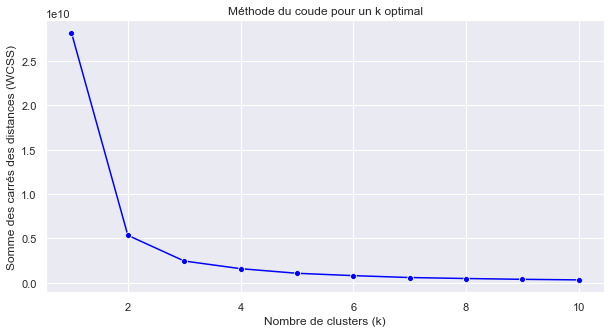

In [39]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_distance_all.jpeg'))
plt.figure(figsize=(10,5))
sns.lineplot(K, sum_of_squared_distances,marker='o',color='blue')
plt.title('Méthode du coude pour un k optimal')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Somme des carrés des distances (WCSS)')
# plt.show()

plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

In [40]:
# We can verify this by calculating the silhouette coefficient and CH score for k=4.
print('silhouette_score is:      ',  [round(si_coef[t],3) for t in range(0,len(si_coef)) ])
coef_variation = ([round(si_coef[t]- si_coef[t-1],3) for t in range(0,len(si_coef)) ]) 
print('Delta silhouette_score is:', coef_variation)


silhouette_score is:       [0.696, 0.633, 0.577, 0.531, 0.523, 0.519, 0.513, 0.498, 0.494]
Delta silhouette_score is: [0.202, -0.063, -0.056, -0.046, -0.008, -0.004, -0.006, -0.014, -0.004]


Here we can see the drop in the sum of squared distance starts to slow down after k=2. Hence 3 is the optimal number of clusters for our analysis.

In [41]:
kp=5
k_means = KMeans(n_clusters=kp).fit(x)
labels  =k_means.labels_
centers=k_means.cluster_centers_

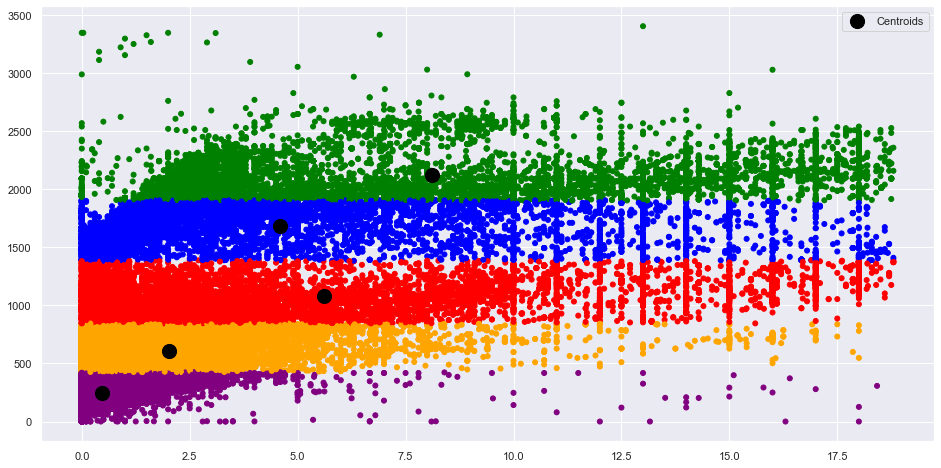

<Figure size 432x288 with 0 Axes>

In [42]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_clusters_train_test_separe.jpeg'))
colors_clusters=ListedColormap(['blue','orange','green','red','purple'])
fig= plt.figure(figsize=(16,8)) 
plt.scatter(x[:, 0],x[:, 1], c=labels.astype(float),s=25, cmap=colors_clusters)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200,label = 'Centroids')
plt.legend()
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

In [43]:
df_projet_clusters= df_projet.loc[:, feat_cols]
df_projet_clusters['nutriscore']= pd.Series(y, index=df_projet_clusters.index)
df_projet_clusters['nutriscore_grade']= pd.Series(df_projet.loc[:, 'nutriscore_grade'], index=df_projet_clusters.index)
df_projet_clusters['nutriscore_score']= pd.Series(df_projet.loc[:, 'nutriscore_score'], index=df_projet_clusters.index)
df_projet_clusters['product_name']= pd.Series(df_projet.loc[:, 'product_name'], index=df_projet_clusters.index)

df_projet_clusters['Clusters'] = pd.Series(labels, index=df_projet_clusters.index)

In [44]:
df_projet_clusters.head()

,saturated-fat_100g,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g,nova_group,ecoscore_score_fr,additives_n,fiber_100g,nutriscore,nutriscore_grade,nutriscore_score,product_name,Clusters
0,0.5,669.0,2.20,25.20,0.60,9.50,0.14,4.0,80.0,3.0,1.6,-4.0,a,-4.0,BAguette bressan,1
1,9.6,2318.0,53.20,11.70,0.50,8.20,1.08,3.0,64.0,0.0,1.3,23.0,e,23.0,Pesto à La Roquette Bio Kazidomi,2
2,0.0,1527.0,1.18,71.76,4.71,12.94,0.48,4.0,79.0,0.0,2.4,3.0,c,3.0,Sliced Plain Bagel,0
3,0.0,1046.0,0.00,95.00,0.00,0.00,0.00,4.0,28.0,2.0,0.0,3.0,c,3.0,Pastille Vichy,3
4,1.7,678.0,6.60,17.00,3.70,8.20,0.29,4.0,64.0,2.0,0.9,1.0,b,1.0,Crêpes jambon fromage,1


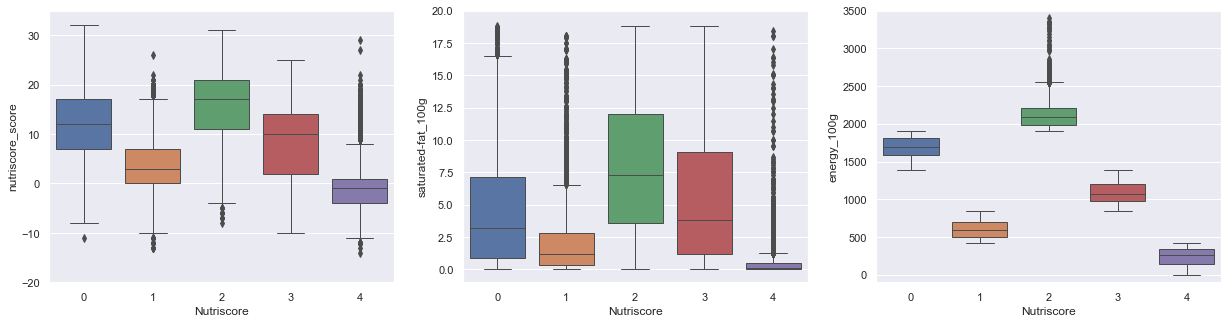

In [45]:
fig, axs = plt.subplots (1, 3, figsize=(21, 5))
boxplot_plot(df_projet_clusters,'','Clusters','nutriscore_score','nutriscore_score',axs[0],linewidthy,"Nutriscore",-20,35,0)
boxplot_plot(df_projet_clusters,'','Clusters','saturated-fat_100g','saturated-fat_100g',axs[1],linewidthy,"Nutriscore",-1,20,0)
boxplot_plot(df_projet_clusters,'','Clusters','energy_100g','energy_100g',axs[2],linewidthy,"Nutriscore",-100,3500,0)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


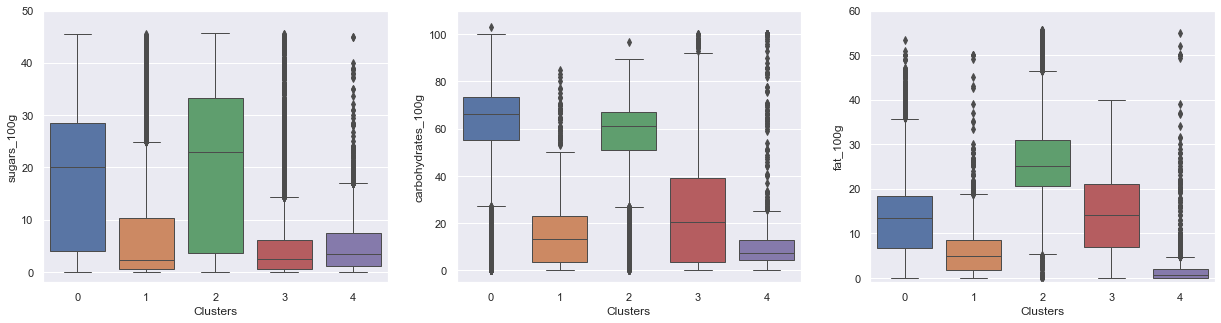

In [46]:
fig, axs = plt.subplots (1, 3, figsize=(21, 5))
boxplot_plot(df_projet_clusters,'','Clusters','sugars_100g','sugars_100g',axs[0],linewidthy,"Clusters",-2,50,0)
boxplot_plot(df_projet_clusters,'','Clusters','carbohydrates_100g','carbohydrates_100g',axs[1],linewidthy,"Clusters",-5,110,0)
boxplot_plot(df_projet_clusters,'','Clusters','fat_100g','fat_100g',axs[2],linewidthy,"Clusters",-1,60,0)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


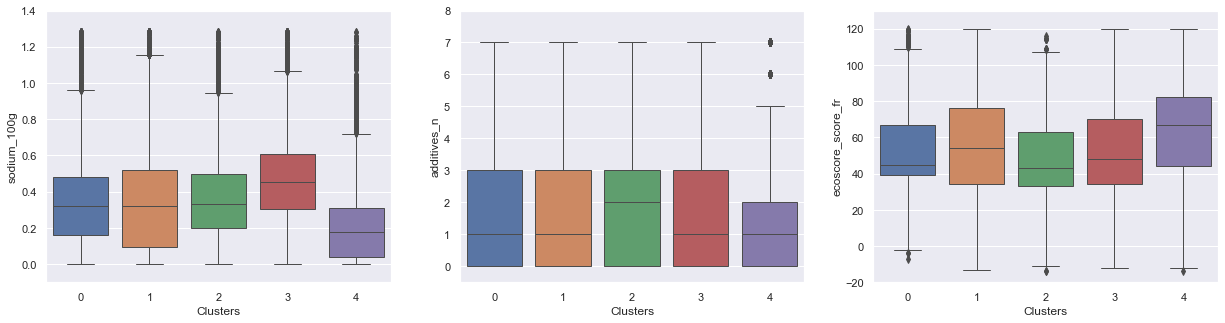

In [47]:
fig, axs = plt.subplots (1, 3, figsize=(21, 5))
boxplot_plot(df_projet_clusters,'','Clusters','sodium_100g','sodium_100g',axs[0],linewidthy,"Clusters",-0.1,1.4,0)
boxplot_plot(df_projet_clusters,'','Clusters','additives_n','additives_n',axs[1],linewidthy,"Clusters",-.5,8,0)
boxplot_plot(df_projet_clusters,'','Clusters','ecoscore_score_fr','ecoscore_score_fr',axs[2],linewidthy,"Clusters",-20,130,0)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


##### Find healthy aliments

In [48]:
score_distribution= df_projet_clusters.groupby(['Clusters']).count()
score_distribution.drop(score_distribution.columns.difference(['Clusters','nutriscore_grade']), 1, inplace=True)
score_distribution = score_distribution.rename({'nutriscore_grade':"Nombre de données par clusters"}, axis=1)

In [49]:
df_to_norm=df_projet_clusters.drop(['nutriscore_grade','product_name'],axis=1)
Indicator=((df_to_norm-df_to_norm.min())/(df_to_norm.max()-df_to_norm.min()))
Indicator["Clusters"]=df_to_norm["Clusters"]
Indicator= Indicator.groupby(['Clusters']).sum()
Indicator= Indicator.prod(axis=1)

score_distribution['Indicator'] = Indicator
score_distribution=score_distribution.sort_values(by='Indicator', ascending=True)
score_distribution

,Nombre de données par clusters,Indicator
Clusters,,
4,15242,2.07e+43
3,8077,3.06e+44
1,10919,3.31e+44
0,8563,1.06e+46
2,10128,6.14e+47


In [50]:
Indicator.head()

Clusters
0    1.06e+46
1    3.31e+44
2    6.14e+47
3    3.06e+44
4    2.07e+43
dtype: float64

In [51]:
Good_prod=score_distribution[score_distribution['Indicator']==Indicator.min()]
print( Good_prod)  

          Nombre de données par clusters  Indicator
Clusters                                           
4                                  15242   2.07e+43


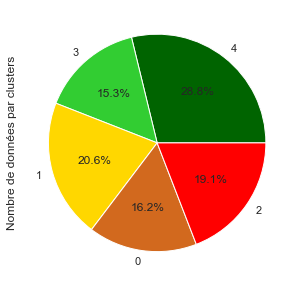

In [52]:
colors=['darkgreen','limegreen','gold','chocolate','red']
score_distribution.plot.pie(y='Nombre de données par clusters',figsize=(5, 5),autopct='%1.1f%%', legend=False, colors=colors)

figure_name =Path(str(dir_fig) +'/' + str(region) + str('donnees_count_nutrigrade.jpeg'))
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')   

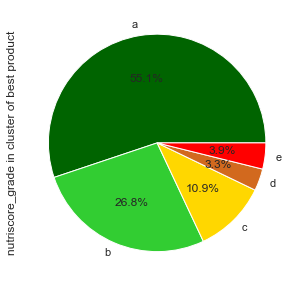

In [53]:
score_distribution=score_distribution.reset_index()
BON_ALIM=df_projet_clusters[df_projet_clusters['Clusters']==score_distribution['Clusters'][0]] 
BON_ALIM_count= BON_ALIM.groupby(['nutriscore_grade']).count()
BON_ALIM_count.drop(BON_ALIM_count.columns.difference(['Clusters','nutriscore_grade']), 1, inplace=True)

BON_ALIM_count = BON_ALIM_count.rename({'Clusters':"nutriscore_grade in cluster of best product"}, axis=1)
BON_ALIM_count.plot.pie(y='nutriscore_grade in cluster of best product',figsize=(5, 5),autopct='%1.1f%%', legend=False, colors=colors)

figure_name =Path(str(dir_fig) +'/' + str(region) + str('donnees_count_nutrigrade.jpeg'))
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')   

In [54]:
BON_ALIM_count

,nutriscore_grade in cluster of best product
nutriscore_grade,
a,8405
b,4091
c,1657
d,498
e,591


In [55]:
BON_ALIM.drop(BON_ALIM.columns.difference(['product_name','nutriscore_grade']), 1, inplace=True)
BON_ALIM.groupby(['nutriscore_grade']) 

In [56]:
nutriscore=BON_ALIM['nutriscore_grade'].unique()

dff=[]
for kx in range(0,len(nutriscore)):
    gp=str(nutriscore[kx])
    dataa=BON_ALIM[BON_ALIM['nutriscore_grade']==str(gp)]
    product=dataa['product_name']
    data={gp:product}
    if gp=='a':
        df_final =pd.DataFrame(data,columns=list(gp))
    else:
        s1 = pd.DataFrame(data,columns=list(gp))
        s1.reset_index(drop=True, inplace=True)
        df_final.reset_index(drop=True, inplace=True)
        df_final=pd.concat([df_final, s1], axis=1, ignore_index=False)
    

In [57]:
df_final.head()

,a,b,c,e,d
0,Sauce Tomate Aux Champignons Bio Kazidomi,Salade Ibérique,"Trader jose's, salsa autentica",Iced Tea Spanish Peach,Barbecue Sauce
1,Sauce Tomate Puttanesca Bio Kazidomi,CRANBERRY & RASPERRY JUICE DRINK,Cultured buttermilk,"Kroger, green tea, hibiscus",Special Barbecue Sauce
2,Sauce Tomate Aux Courgettes Bio Kazidomi,Soy Milk,Whole milk,Original green tea,100% juice
3,Sauce Tomate Au Thon & Olives Bio Kazidomi,Gourmet Pizza Sauce,1% lowfat milk,Citrus Green Tea,Sparkling juice blend
4,Sauce tomate aux légumes bio Kazidomi,Cultured Lowfat Buttermilk,Pizza Snack Sauce,Boisson Goyave 25 CL,SALSA KETCHUP


#### KMeans with train and test data separeted 

In [58]:
sum_of_squared_distances_split = []
si_coef_split = []
K = range(1,11)
for k in K:
    k_means_split = KMeans(n_clusters=k)
    model_split = k_means_split.fit(X_train)
    sum_of_squared_distances_split.append(k_means_split.inertia_)
    labels_k_split = k_means_split.labels_
    if k>1:
        si_coef_split.append(metrics.silhouette_score(X_train, labels_k_split, metric = 'euclidean'))

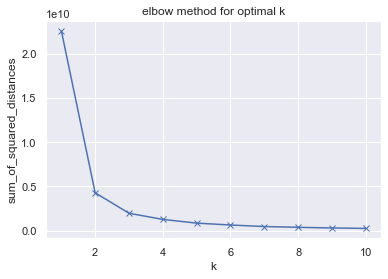

<Figure size 432x288 with 0 Axes>

In [59]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_distance_train_test_separe.jpeg'))

plt.plot(K, sum_of_squared_distances_split, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

In [60]:
coef_variation = ([ si_coef_split[t]- si_coef_split[t-1] for t in range(1,len(si_coef_split)) ]) 
print(coef_variation)


[-0.06404130878928727, -0.05593088458908557, -0.045009061458259, -0.005811976902192928, -0.006254786052104722, -0.006817482771376171, -0.012063178546796727, -0.006320226305706778]


In [61]:
k_means_split = KMeans(n_clusters=kp).fit(X_train)
labels_split  =k_means_split.labels_
centers_split =k_means_split.cluster_centers_
pred_labels_split=k_means_split.predict(X_test)

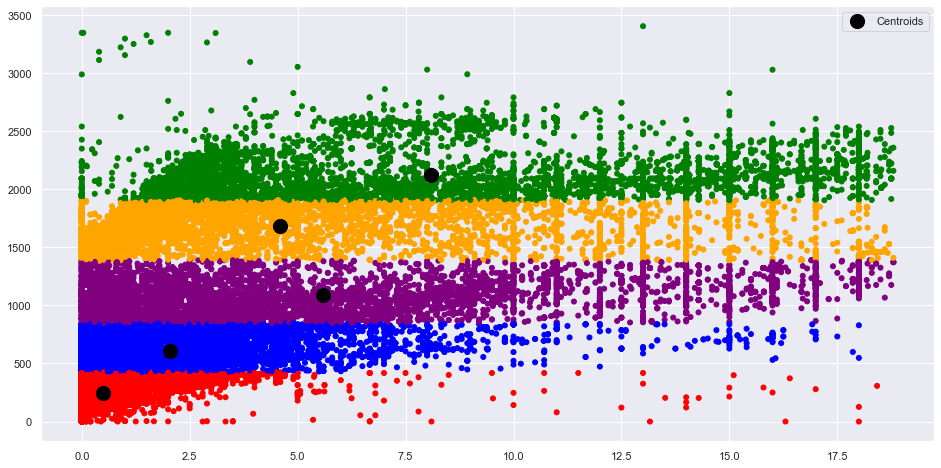

<Figure size 432x288 with 0 Axes>

In [62]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_clusters_train_test_separe.jpeg'))

fig= plt.figure(figsize=(16,8)) 
plt.scatter(X_train[:, 0],X_train[:, 1], c=labels_split.astype(float),s=25, cmap=colors_clusters)
plt.scatter(centers_split[:, 0], centers_split[:, 1], c='black', s=200,label = 'Centroids')
plt.legend()
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

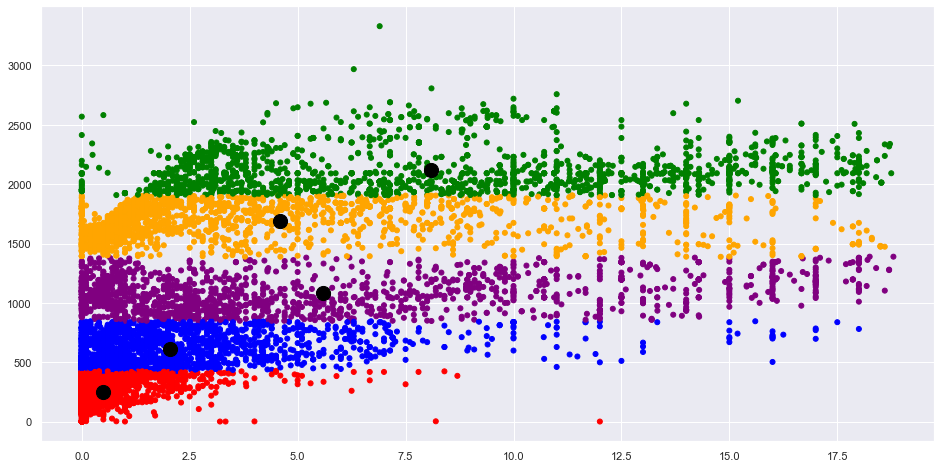

<Figure size 432x288 with 0 Axes>

In [63]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('k_means_clusters_predited_train_test_separe.jpeg'))

fig= plt.figure(figsize=(16,8))
plt.scatter(X_test[:, 0],X_test[:, 1], c=pred_labels_split,s=25, cmap=colors_clusters); 
plt.scatter(centers_split[:, 0], centers_split[:, 1], c='black', s=200,label = 'Centroids')
plt.show()
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')

##### Find healthy aliments

In [64]:
X_split_fea=['saturated-fat_100g','energy_100g','fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','sodium_100g',\
             'nova_group','ecoscore_score_fr','additives_n','fiber_100g','product_name','nutriscore_grade','categories']
import copy
X_train_all_re=copy.deepcopy(X_train_all)
X_test_all_re =copy.deepcopy(X_test_all)

X_train_all_re.columns =X_split_fea
X_test_all_re.columns  = X_split_fea

X_train_re_s1 = pd.DataFrame(y_train,columns=['nutriscore_score'])
X_test_re_s1  = pd.DataFrame(y_test, columns=['nutriscore_score'])
X_train_all_re= pd.concat([X_train_all_re, X_train_re_s1], axis=1)
X_test_all_re = pd.concat([X_test_all_re, X_test_re_s1], axis=1)

train_index=X_train_all_re.index.unique()
test_index =X_test_all_re.index.unique()

X_train_re_c  = pd.DataFrame(labels_split,index=train_index,columns=['Clusters'])
X_test_re_c   = pd.DataFrame(pred_labels_split,index=test_index,columns=['Clusters'])

X_train_all_re= pd.concat([X_train_all_re, X_train_re_c], axis=1)
X_test_all_re =pd.concat([X_test_all_re, X_test_re_c], axis=1)

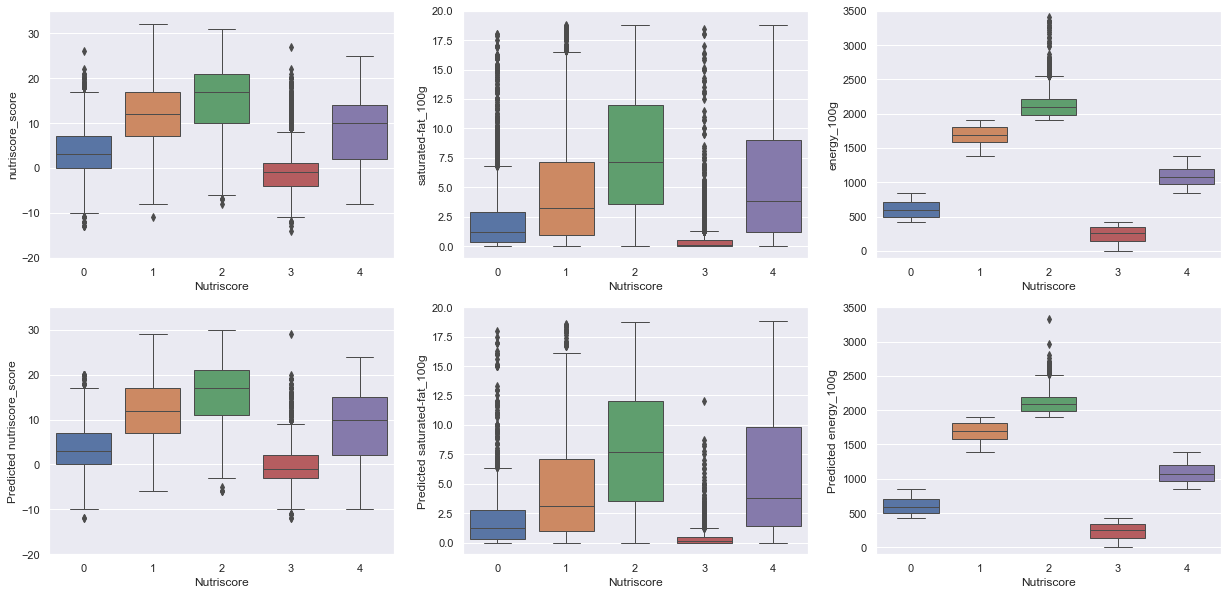

In [65]:
fig, axs = plt.subplots (2, 3, figsize=(21, 10))
boxplot_plot(X_train_all_re,'','Clusters','nutriscore_score','nutriscore_score',axs[0,0],linewidthy,"Nutriscore",-20,35,0)
boxplot_plot(X_train_all_re,'','Clusters','saturated-fat_100g','saturated-fat_100g',axs[0,1],linewidthy,"Nutriscore",-1,20,0)
boxplot_plot(X_train_all_re,'','Clusters','energy_100g','energy_100g',axs[0,2],linewidthy,"Nutriscore",-100,3500,0)
#
boxplot_plot(X_test_all_re,'','Clusters','nutriscore_score','Predicted nutriscore_score',axs[1,0],linewidthy,"Nutriscore",-20,35,0)
boxplot_plot(X_test_all_re,'','Clusters','saturated-fat_100g','Predicted saturated-fat_100g',axs[1,1],linewidthy,"Nutriscore",-1,20,0)
boxplot_plot(X_test_all_re,'','Clusters','energy_100g','Predicted energy_100g',axs[1,2],linewidthy,"Nutriscore",-100,3500,0)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


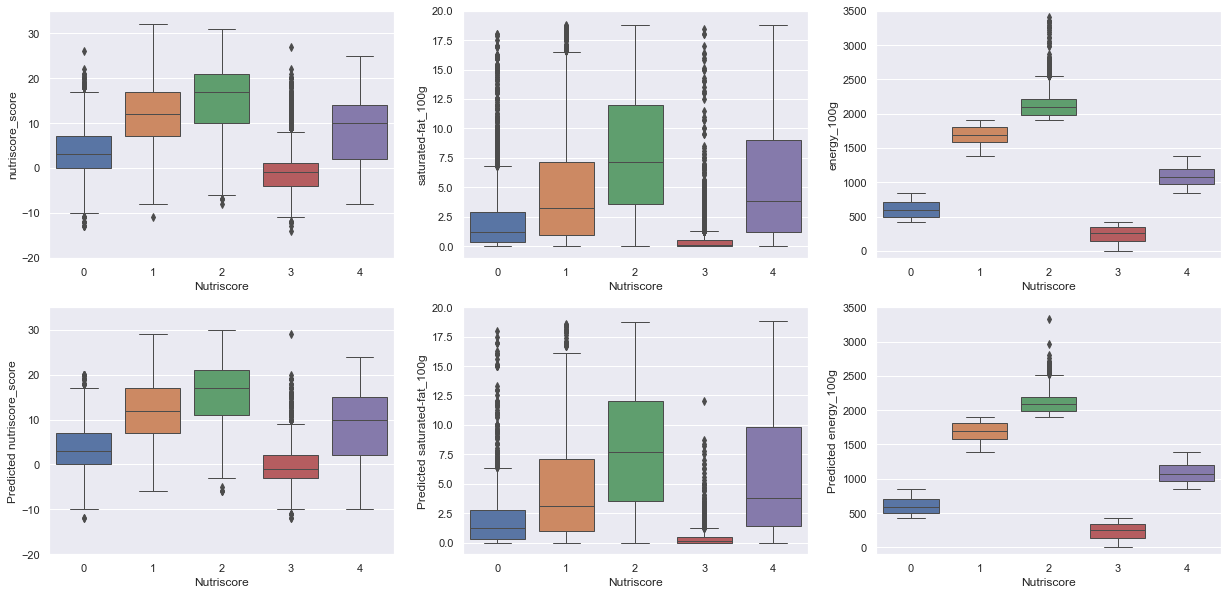

In [66]:
fig, axs = plt.subplots (2, 3, figsize=(21, 10))
boxplot_plot(X_train_all_re,'','Clusters','nutriscore_score','nutriscore_score',axs[0,0],linewidthy,"Nutriscore",-20,35,0)
boxplot_plot(X_train_all_re,'','Clusters','saturated-fat_100g','saturated-fat_100g',axs[0,1],linewidthy,"Nutriscore",-1,20,0)
boxplot_plot(X_train_all_re,'','Clusters','energy_100g','energy_100g',axs[0,2],linewidthy,"Nutriscore",-100,3500,0)
#
boxplot_plot(X_test_all_re,'','Clusters','nutriscore_score','Predicted nutriscore_score',axs[1,0],linewidthy,"Nutriscore",-20,35,0)
boxplot_plot(X_test_all_re,'','Clusters','saturated-fat_100g','Predicted saturated-fat_100g',axs[1,1],linewidthy,"Nutriscore",-1,20,0)
boxplot_plot(X_test_all_re,'','Clusters','energy_100g','Predicted energy_100g',axs[1,2],linewidthy,"Nutriscore",-100,3500,0)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


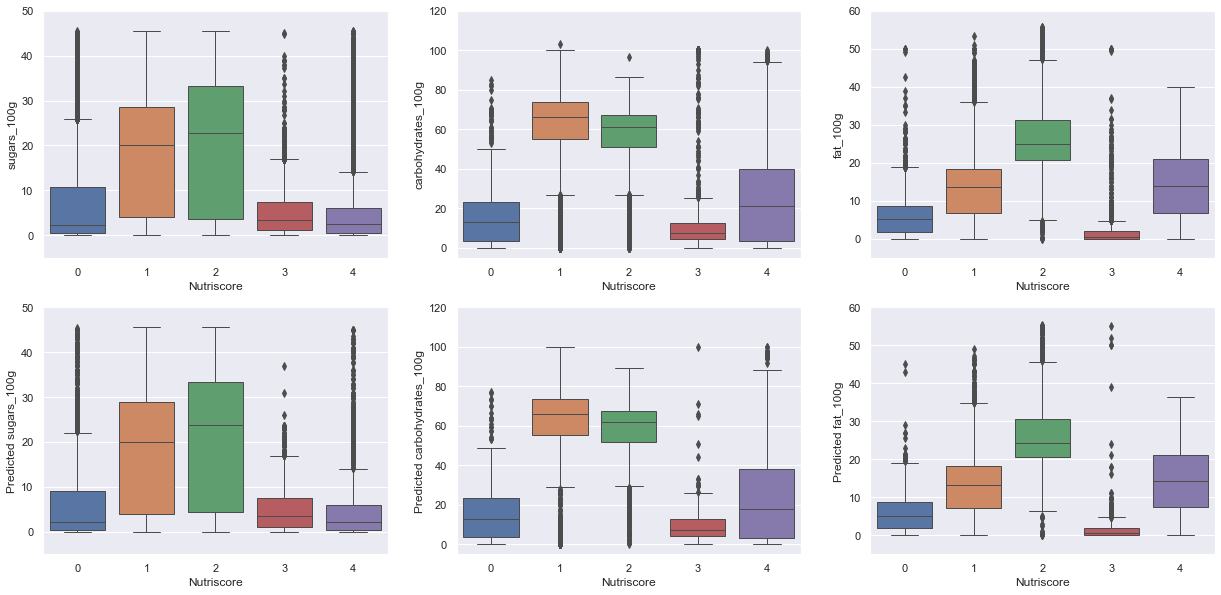

In [67]:
fig, axs = plt.subplots (2, 3, figsize=(21, 10))
boxplot_plot(X_train_all_re,'','Clusters','sugars_100g','sugars_100g',axs[0,0],linewidthy,"Nutriscore",-5,50,0)
boxplot_plot(X_train_all_re,'','Clusters','carbohydrates_100g','carbohydrates_100g',axs[0,1],linewidthy,"Nutriscore",-5,120,0)
boxplot_plot(X_train_all_re,'','Clusters','fat_100g','fat_100g',axs[0,2],linewidthy,"Nutriscore",-5,60,0)
#
boxplot_plot(X_test_all_re,'','Clusters','sugars_100g','Predicted sugars_100g',axs[1,0],linewidthy,"Nutriscore",-5,50,0)
boxplot_plot(X_test_all_re,'','Clusters','carbohydrates_100g','Predicted carbohydrates_100g',axs[1,1],linewidthy,"Nutriscore",-5,120,0)
boxplot_plot(X_test_all_re,'','Clusters','fat_100g','Predicted fat_100g',axs[1,2],linewidthy,"Nutriscore",-5,60,0)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 


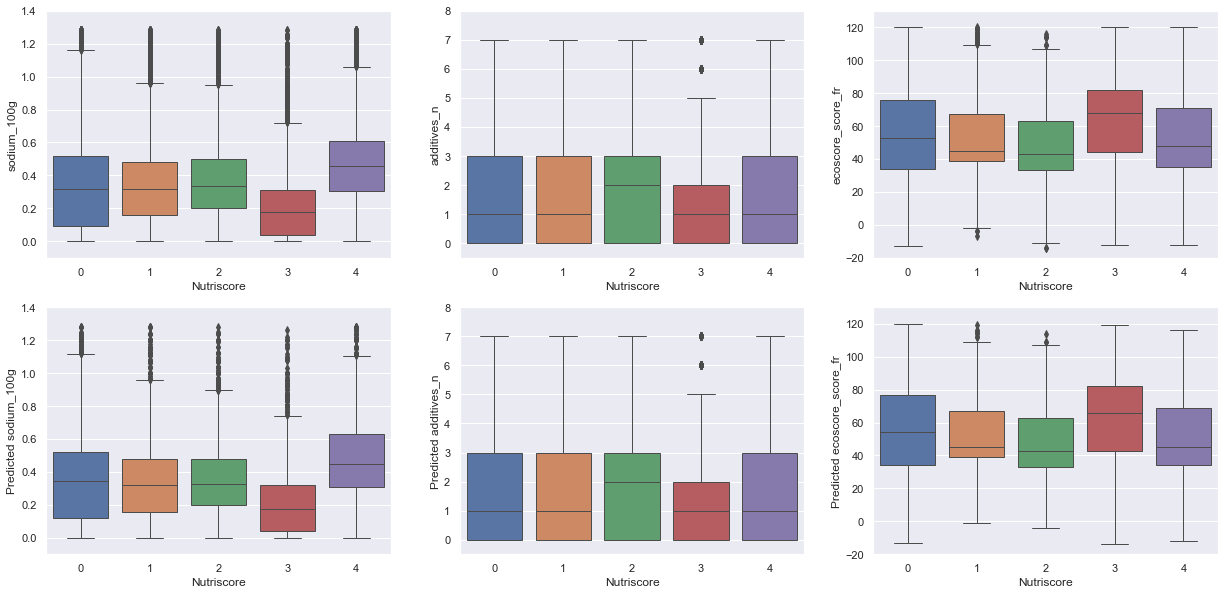

In [68]:
fig, axs = plt.subplots (2, 3, figsize=(21, 10))
boxplot_plot(X_train_all_re,'','Clusters','sodium_100g','sodium_100g',axs[0,0],linewidthy,"Nutriscore",-.1,1.4,0)
boxplot_plot(X_train_all_re,'','Clusters','additives_n','additives_n',axs[0,1],linewidthy,"Nutriscore",-.5,8,0)
boxplot_plot(X_train_all_re,'','Clusters','ecoscore_score_fr','ecoscore_score_fr',axs[0,2],linewidthy,"Nutriscore",-20,130,0)
#
boxplot_plot(X_test_all_re,'','Clusters','sodium_100g','Predicted sodium_100g',axs[1,0],linewidthy,"Nutriscore",-.1,1.4,0)
boxplot_plot(X_test_all_re,'','Clusters','additives_n','Predicted additives_n',axs[1,1],linewidthy,"Nutriscore",-.5,8,0)
boxplot_plot(X_test_all_re,'','Clusters','ecoscore_score_fr','Predicted ecoscore_score_fr',axs[1,2],linewidthy,"Nutriscore",-20,130,0)
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight') 

In [78]:
score_distribution_train= X_train_all_re.groupby(['Clusters']).count()
score_distribution_train.drop(score_distribution_train.columns.difference(['Clusters','nutriscore_grade']), 1, inplace=True)
score_distribution_train = score_distribution_train.rename({'nutriscore_grade':"Nombre de données par clusters"}, axis=1)

In [79]:
df_to_norm_train=X_train_all_re.drop(['nutriscore_grade','product_name','categories'],axis=1)
Indicator_train=((df_to_norm_train-df_to_norm_train.min())/(df_to_norm_train.max()-df_to_norm_train.min()))
Indicator_train["Clusters"]=df_to_norm_train["Clusters"]
Indicator_train= Indicator_train.groupby(['Clusters']).sum()
Indicator_train= Indicator_train.prod(axis=1)

score_distribution_train['Indicator'] = Indicator_train
score_distribution_train=score_distribution_train.sort_values(by='Indicator', ascending=True)
score_distribution_train

,Nombre de données par clusters,Indicator
Clusters,,
3,12312,3.83e+38
4,6419,5.02e+39
0,8709,5.24e+39
1,6842,1.54e+41
2,8061,6.00e+42


          Nombre de données par clusters  Indicator
Clusters                                           
3                                  12312   3.83e+38


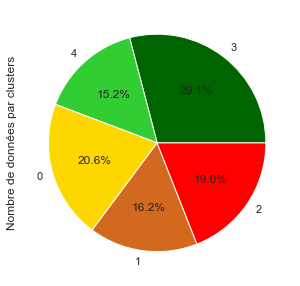

In [72]:
Good_prod_train=score_distribution_train[score_distribution_train['Indicator']==Indicator_train.min()]
print( Good_prod_train) 

score_distribution_train.plot.pie(y='Nombre de données par clusters',figsize=(5, 5),autopct='%1.1f%%', legend=False, colors=colors)

figure_name =Path(str(dir_fig) +'/' + str(region) + str('donnees_count_nutrigrade_train.jpeg'))
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')   

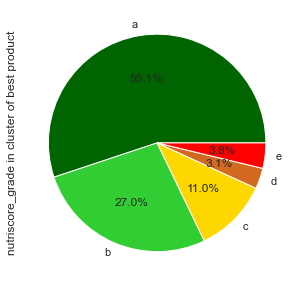

In [74]:
score_distribution_train=score_distribution_train.reset_index()
BON_ALIM_train=X_train_all_re[X_train_all_re['Clusters']==score_distribution_train['Clusters'][0]] 
BON_ALIM_count_train= BON_ALIM_train.groupby(['nutriscore_grade']).count()
BON_ALIM_count_train.drop(BON_ALIM_count_train.columns.difference(['Clusters','nutriscore_grade']), 1, inplace=True)

BON_ALIM_count_train = BON_ALIM_count_train.rename({'Clusters':"nutriscore_grade in cluster of best product"}, axis=1)
BON_ALIM_count_train.plot.pie(y='nutriscore_grade in cluster of best product',figsize=(5, 5),autopct='%1.1f%%', legend=False, colors=colors)

figure_name =Path(str(dir_fig) +'/' + str(region) + str('donnees_count_nutrigrade_train.jpeg'))
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')   

In [75]:
BON_ALIM_count_train
BON_ALIM_train.drop(BON_ALIM_train.columns.difference(['product_name','nutriscore_grade']), 1, inplace=True)
BON_ALIM_train.groupby(['nutriscore_grade']) 

In [76]:
nutriscore_train=BON_ALIM_train['nutriscore_grade'].unique()

for kx in range(0,len(nutriscore_train)):
    gp=str(nutriscore[kx])
    dataa=BON_ALIM_train[BON_ALIM_train['nutriscore_grade']==str(gp)]
    product=dataa['product_name']
    data={gp:product}
    if gp=='a':
        df_final_train =pd.DataFrame(data,columns=list(gp))
    else:
        s1 = pd.DataFrame(data,columns=list(gp))
        s1.reset_index(drop=True, inplace=True)
        df_final_train.reset_index(drop=True, inplace=True)
        df_final_train=pd.concat([df_final_train, s1], axis=1, ignore_index=False)
    

In [77]:
df_final_train.head()

,a,b,c,e,d
0,Epinards Haches a La Creme,Bœuf Bourguignon et Pommes de Terre,Fizzy Apple,ALOE & GREEN TEA,Eau De Coco Fraise Citron
1,"Italian style crushed tomatoes in puree, itali...",Choucroute royale au vin blanc,Gratin de pommes de terre et choux fleurs au C...,Nectar multifruits,Ketchup
2,Kidney beans,"Strawberry lowfat milk, strawberry",Soupe de poissons,Cherry mixed fruit in 100% fruit juice,"NESQUIK Poudre Cacaotée boîte 1,1kg"
3,Stewed tomatoes,Coco sans sucres,Faisselle De Gênevrieres,PRESSup,Bbq Sauce
4,Yaourts Chocolat Ferme & Fondant,Arrabbiata Sauce,Orange mangue,Frutti Fresh Grapefruit Roz,"Boisson Aux Fruits Rouges Shoot Teisseire,"


In [80]:
score_distribution_test= X_test_all_re.groupby(['Clusters']).count()
score_distribution_test.drop(score_distribution_test.columns.difference(['Clusters','nutriscore_grade']), 1, inplace=True)
score_distribution_test = score_distribution_test.rename({'nutriscore_grade':"Nombre de données par clusters"}, axis=1)

df_to_norm_test=X_test_all_re.drop(['nutriscore_grade','product_name','categories'],axis=1)
Indicator_test=((df_to_norm_test-df_to_norm_test.min())/(df_to_norm_test.max()-df_to_norm_test.min()))
Indicator_test["Clusters"]=df_to_norm_test["Clusters"]
Indicator_test= Indicator_test.groupby(['Clusters']).sum()
Indicator_test= Indicator_test.prod(axis=1)

score_distribution_test['Indicator'] = Indicator_test
score_distribution_test=score_distribution_test.sort_values(by='Indicator', ascending=True)
score_distribution_test

,Nombre de données par clusters,Indicator
Clusters,,
3,2998,1.35e+31
0,2181,3.56e+32
4,1631,3.69e+32
1,1723,1.05e+34
2,2053,5.02e+35


          Nombre de données par clusters  Indicator
Clusters                                           
3                                   2998   1.35e+31


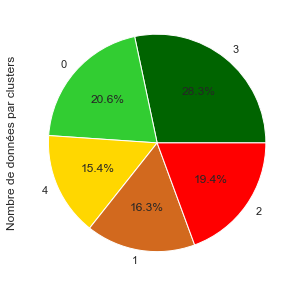

In [81]:
Good_prod_test=score_distribution_test[score_distribution_test['Indicator']==Indicator_test.min()]
print( Good_prod_test) 

score_distribution_test.plot.pie(y='Nombre de données par clusters',figsize=(5, 5),autopct='%1.1f%%', legend=False, colors=colors)

figure_name =Path(str(dir_fig) +'/' + str(region) + str('donnees_count_nutrigrade_test.jpeg'))
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')   

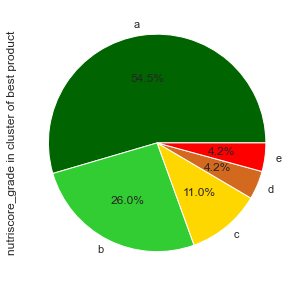

In [82]:
score_distribution_test=score_distribution_test.reset_index()
BON_ALIM_test=X_test_all_re[X_test_all_re['Clusters']==score_distribution_test['Clusters'][0]] 
BON_ALIM_count_test= BON_ALIM_test.groupby(['nutriscore_grade']).count()
BON_ALIM_count_test.drop(BON_ALIM_count_test.columns.difference(['Clusters','nutriscore_grade']), 1, inplace=True)

BON_ALIM_count_test = BON_ALIM_count_test.rename({'Clusters':"nutriscore_grade in cluster of best product"}, axis=1)
BON_ALIM_count_test.plot.pie(y='nutriscore_grade in cluster of best product',figsize=(5, 5),autopct='%1.1f%%', legend=False, colors=colors)

figure_name =Path(str(dir_fig) +'/' + str(region) + str('donnees_count_nutrigrade_test.jpeg'))
plt.savefig(figure_name,format='jpeg',dpi=100,bbox_inches='tight')   

## Conclusion 